<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:dodgerblue;letter-spacing:1px;overflow:hidden"><b> BIKE DEMAND PROJECT</b></div>

<p style="text-align: center"><font color='Magenta'> <b>DS-4</b><font color='black'><p>
    
<p style="text-align: center;"><font color='dodgerblue'> <b>Data Analytics Final Project  | May 2024</b><font color='orange'><p>


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=dodgerblue> 🎯 Project Description:</font></h3>   

- Bu projede, Londra bisiklet paylaşımlarının geçmiş verilerini görselleştirme araçlarıyla göstererek verilerdeki güncel örüntüleri ortaya çıkartacağız.Veri Seti üzerinde temel Keşifsel Veri Analizi (EDA) gerçekleştireceğiz.
-Seaborn ve Matplotlib'i kullanarak Bisiklet paylaşım sayılarını görselleştireceğiz.
- 
    
<h3 align="left"><font color=dodgerblue> 📝 About the Datasets </font></h3>    
    
    
**Dataset Descriptions:** 'store.sharing.csv'

- **Content:** Londra Bisiklet paylaşımlarının mevsimlere,hava sıcaklığına,rüzgar hızına vb. göre kullanım sayılarının değişimi
- **Rows:** 17414    
- **Columns:** 10 
    - **timestamp**: Timestamp field for grouping the data
    - **cnt**: The count of a new bike shares
    - **t1**: Real temperature in C Daily return for JPMorgan Chase & Co.
    - **t2**: Temperature in C “feels like”
    - **hum**: humidity in percentage
    - **wind_speed**: wind speed in km/h
    - **weather_code**: category of the weather
          - "weather_code" category description:
             1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
             2 = scattered clouds / few clouds
             3 = Broken clouds
             4 = Cloudy
             7 = Rain/ light Rain shower/ Light rain
             10 = rain with thunderstorm
             26 = snowfall
             94 = Freezing Fog
    - **is_holiday**:boolean field - 1 holiday / 0 non holiday
    - **is_weekend**: boolean field - 1 if the day is weekend
    - **season**: category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
 
- **Purpose:** Welcome to "Bike Demand Visualization Project" . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.
    The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

    
    
    
    
- timestamp :Zaman 
    
- cnt : Bisiklet paylaşımlarının sayısı

- t1 : Gerçek sıcaklık (°C)

- t2 : Hissedilen sıcaklık(°C)

- hum : Nem yüzdesi (%)

- wind_speed : Rüzgar hızı (km/h)

- weather_code : Hava durumu 

    "weather_code" category description:

    1 = Clear ; Açık hava
    2 = Az bulutlu
    3 = Parçalı Bulutlu
    4 = Bulutlu
    7 = Yağmur/ hafif sağanak yağmur/hafif yağmur
    10 = Gökgürültülü yağmur
    26 = Kar yağışı
    94 = Dondurucu

- is_holiday :  1 ise tatil günü  / 0 ise tatil olmayan gün
- is_weekend : Eğer gün haftasonu ise 1 değilse 0
- season : Mevsimler 0-ilkbahar ; 1-yaz; 2-sonbahar; 3-kış.
    

    

#  <font color='dodgerblue'><b> Understanding The Data</b><font color='orange'>

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl  
import matplotlib.pyplot as plt 
import seaborn as sns  
import missingno as mn
%matplotlib inline 
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df0 = pd.read_csv('store_sharing.csv')
df = df0.copy()

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [11]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print("\nNumber of duplicate rows:", duplicate_rows)
    print("Duplicate Rows:")
    print(df[df.duplicated()])
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


In [15]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [17]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


# <font color='dodgerblue'> <b>According to the provided graph showing the maximum and minimum bike shares by season, which season had the highest maximum number of bike shares? </b><font color='orange'>

In [5]:
df.groupby("season")["cnt"].agg([max,min,np.mean])

,max,min,mean
season,,,
0.0,5322,0,1103.831589
1.0,7860,12,1464.465238
2.0,5422,9,1178.954218
3.0,4415,10,821.729099


In [6]:
df.groupby("season")["wind_speed"].agg([max,min,np.mean])

,max,min,mean
season,,,
0.0,54.0,0.0,16.395482
1.0,43.5,0.0,15.783793
2.0,56.5,0.0,14.330428
3.0,56.0,0.0,17.127252


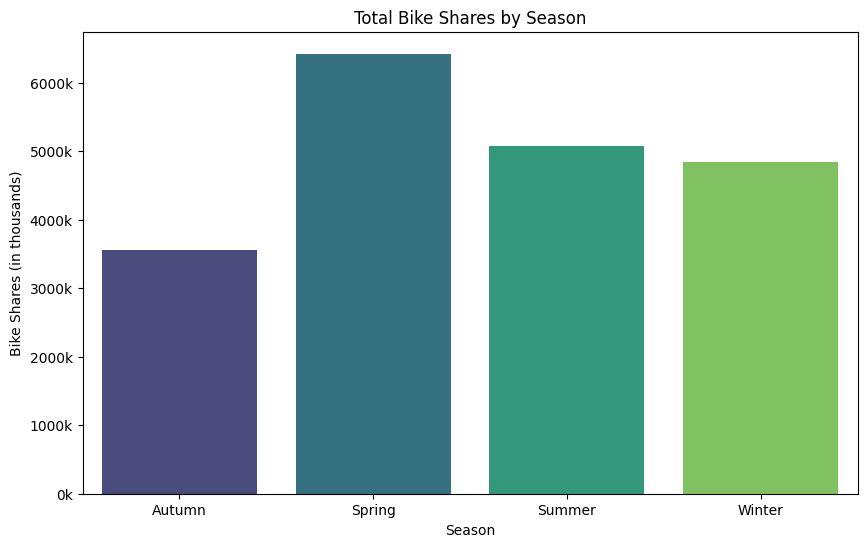

In [29]:
# Plotting bike sharing by season as a bar chart with y-axis labeled in thousands
plt.figure(figsize=(10, 6))
sns.barplot(x='season_label', y='cnt', data=seasonal_data, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Bike Shares (in thousands)')
plt.title('Total Bike Shares by Season')

# Update the y-axis labels to show numbers in thousands
y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label/1000)}k' for label in y_labels])

plt.show()

# <font color='dodgerblue'> <b>Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)</b><font color='orange'>

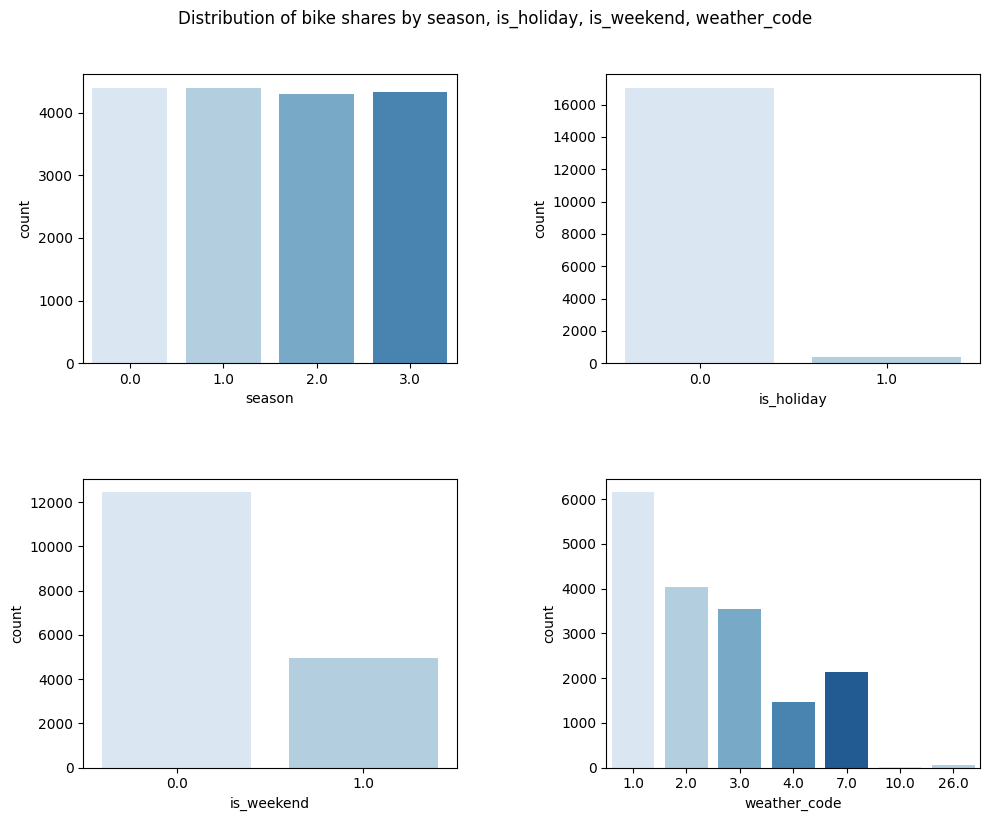

In [30]:
plt.figure(figsize=(10, 8))


plt.suptitle("Distribution of bike shares by season, is_holiday, is_weekend, weather_code", y=1.02)

#Renk paleti oluşturma (mavi tonları)
blue_palette = sns.color_palette("Blues", n_colors=5)

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='season', palette=blue_palette)


plt.subplot(2, 2, 2)
sns.countplot(data=df, x='is_holiday', palette=blue_palette)


plt.subplot(2, 2, 3)
sns.countplot(data=df, x='is_weekend', palette=blue_palette)


plt.subplot(2, 2, 4)
sns.countplot(data=df, x='weather_code', palette=blue_palette)


#tight_layout ile alt grafikler arasındaki boşluğu ayarlama
plt.tight_layout(rect=[0, 0, 1, 1])

#subplots_adjust ile grafikler arasındaki boşluğu artırma
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()


#weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode) </font>  
 
- Tatil olmayan günlerde ve hafta içi olan günlerde daha fazla bisiklet paylaşımı yapıldığı görülmektedir.   
    
- Hava sıcaklığının daha yüksek olduğu zamanlarda bisiklet paylaşımları daha fazladır.
 
- Hafif yağmurlu havalarda,bulutlu güne göre daha fazla kullanıldığı görülmektedir.İnsanlar hafif  yağmurdan dolayı yürümektense gideceği yere daha hızlı ulaşacağı için bisikleti tercih etmiş olabilir.

# <font color='dodgerblue'> <b>Heatmap</b><font color='orange'>

### <font color='dodgerblue'> <b>According to the correlation matrix shown, which two variables have the highest positive correlation with each other, and what is the value of that correlation? </b><font color='orange'>

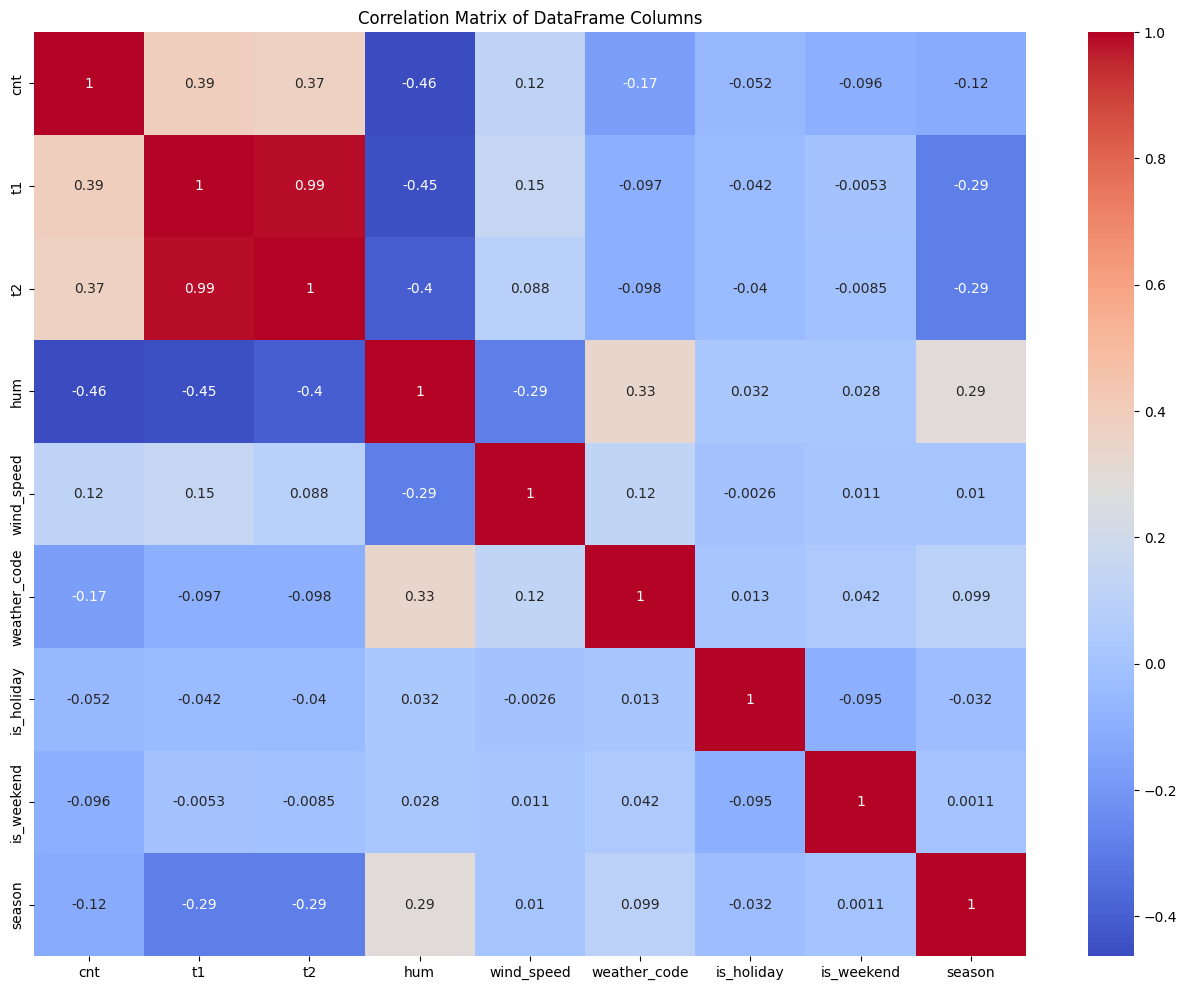

In [40]:
df_numeric = pd.get_dummies(df, columns=["year-month", "day_of_name"])

# Korelasyon matrisini hesaplayalım
correlation_matrix = df.iloc[:,0:9].corr()


# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of DataFrame Columns')
plt.show()

<Axes: >

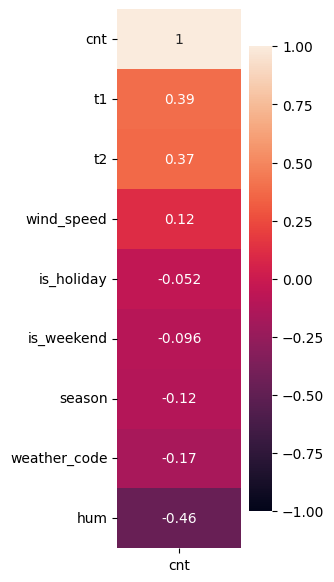

In [42]:
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt, annot=True, vmin=-1, vmax=1)

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output:  Visualize the correlation with a heatmap.</font>  
 
- -En yüksek korelasyon bisiklet paylaşımı(cnt) ile t1(sıcaklık) ve t2(hissedilen sıcaklık) arasında gözlenmiştir.Bu da sıcak havalarda bisiklet kullanımının arttığını göstermektedir.
-En güçlü negatif korelasyon ise hum(nem) ile bisiklet paylaşımı(cnt)  arasında  gözlenmiştir.Yani nem arttıkça bisiklet kullanımı azalmaktadır.
-Tatil günleri ve hafta sonları ile bisiklet kullanımı arasında zayıf negatif korelasyon bulunmaktadır.

### <font color='dodgerblue'> <b>Negatife and positive correlation between target variable and the other features </b><font color='orange'>

<Figure size 1000x600 with 0 Axes>

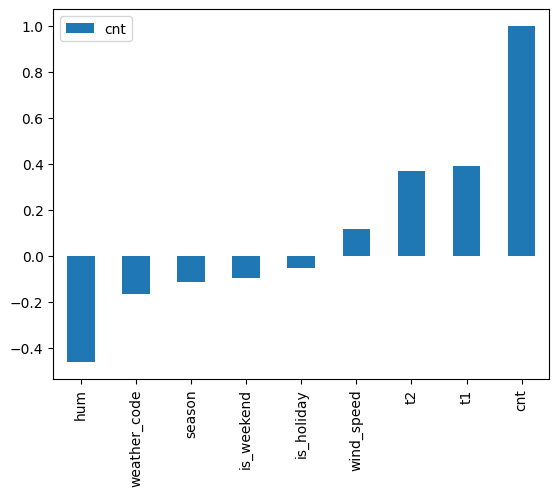

In [31]:
plt.figure(figsize=(10,6))

df.iloc[:,0:9].corr()[["cnt"]].sort_values(by="cnt").plot.bar();

 # <font color='dodgerblue'> <b> Distribution of Bike shares over time.</b><font color='orange'>


In [24]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [22]:
df.timestamp = pd.to_datetime(df.timestamp)

In [23]:
df.set_index("timestamp", inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [26]:
df["year-month"] = df.index.strftime("%Y-%m")
df["year"] =  df.index.year
df["month"] =  df.index.month
df["day_of_month"] =  df.index.day
df["day_of_week"] =  df.index.dayofweek
df["day_of_name"] = df.index.day_name()
df["hour"] = df.index.hour

In [42]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour,season_label
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,0,Autumn
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,1,Autumn
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,2,Autumn
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,3,Autumn
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,4,Autumn


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year-month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  int64  
 12  day_of_month  17414 non-null  int64  
 13  day_of_week   17414 non-null  int64  
 14  day_of_name   17414 non-null  object 
 15  hour          17414 non-null  int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 2.3+ MB


 ### <font color='dodgerblue'> <b>Bike shares by years </b><font color='orange'>

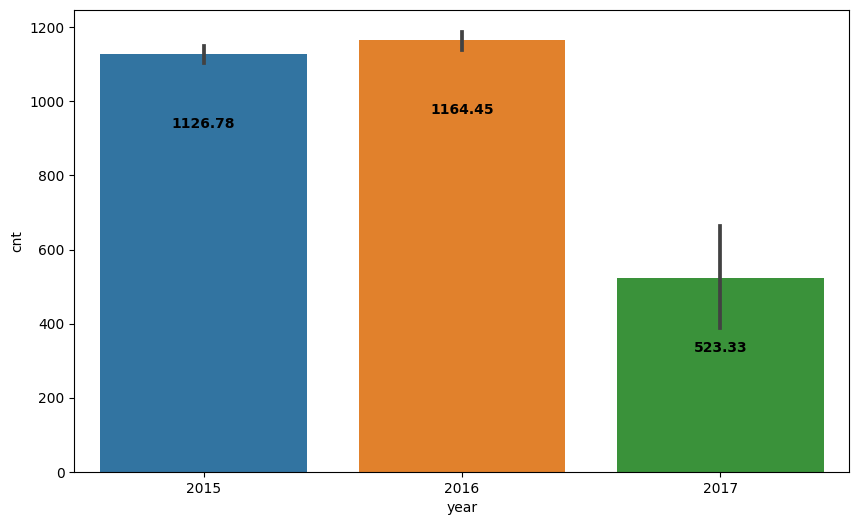

In [65]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x="year", y="cnt")
for p in ax.patches:
    ax.annotate(round(p.get_height(), 2), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,-50), textcoords='offset points',fontweight='bold')

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output:Plot bike shares by year. Plot bike shares on holidays by seasons </font>  
 
-  2017 yılında Bisiklet paylaşımının az olması verinin az olmasından kaynaklanmaktadır.

 ### <font color='dodgerblue'> <b>Bike shares by years-months </b><font color='orange'>

In [46]:
df["year-month"] = df.index.strftime("%Y-%m")

In [47]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,4


In [48]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum())
df_sum

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


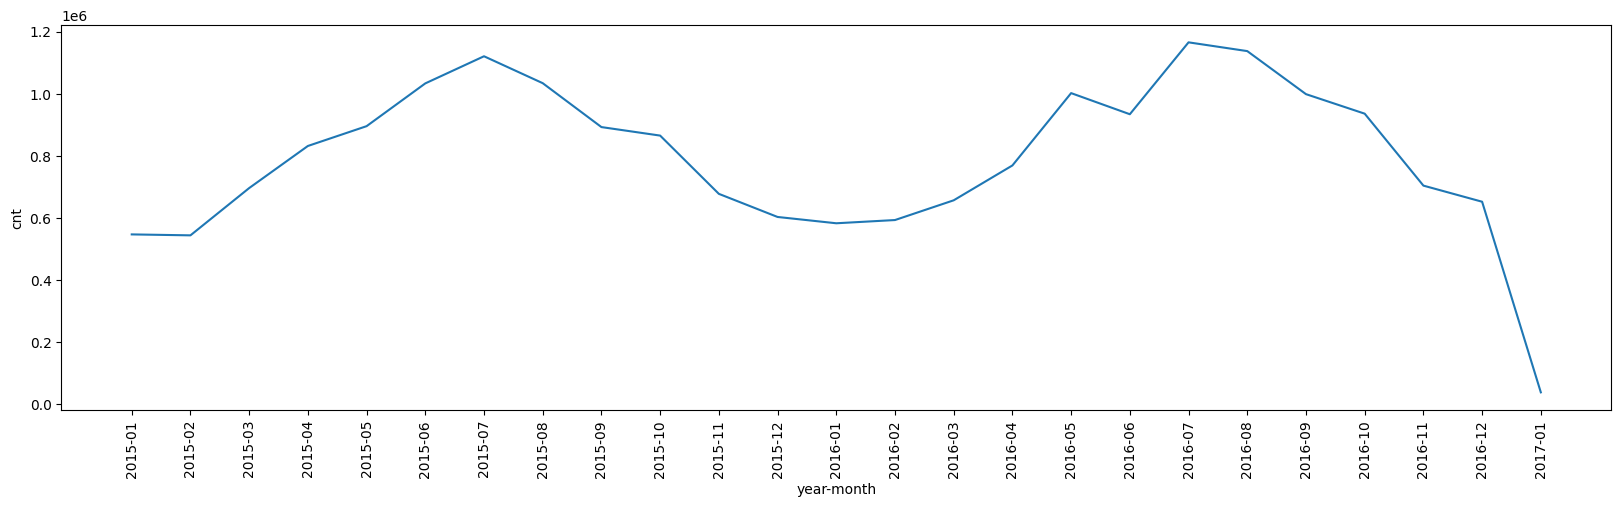

In [49]:
plt.figure(figsize=(20,5))
sns.lineplot(x="year-month",y="cnt", data = df_sum);
plt.xticks(rotation=90);

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output:  Plot bike shares over time use lineplot.</font>  
 
- En yüksek bisiklet kullanımı  2015 Temmuz ayında gerleşmiştir.Yaz aylarında bisiklet kullanımı artmaktadır.

 ### <font color='dodgerblue'> <b>Bike shares by months </b><font color='orange'>

In [53]:
df_sum_2 = pd.DataFrame(df.groupby("month").cnt.sum())
df_sum_2

,cnt
month,
1,1166837
2,1136504
3,1352461
4,1600427
5,1897348
6,1967130
7,2286214
8,2171265
9,1891097


<Axes: xlabel='month', ylabel='cnt'>

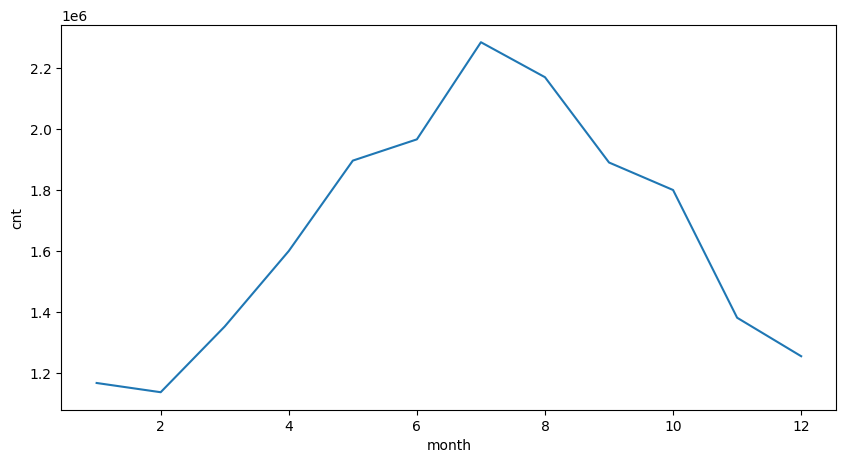

In [54]:
plt.figure(figsize=(10,5))
sns.lineplot(x="month",y="cnt", data = df_sum_2)

 ### <font color='dodgerblue'> <b>Bike shares by week </b><font color='orange'>

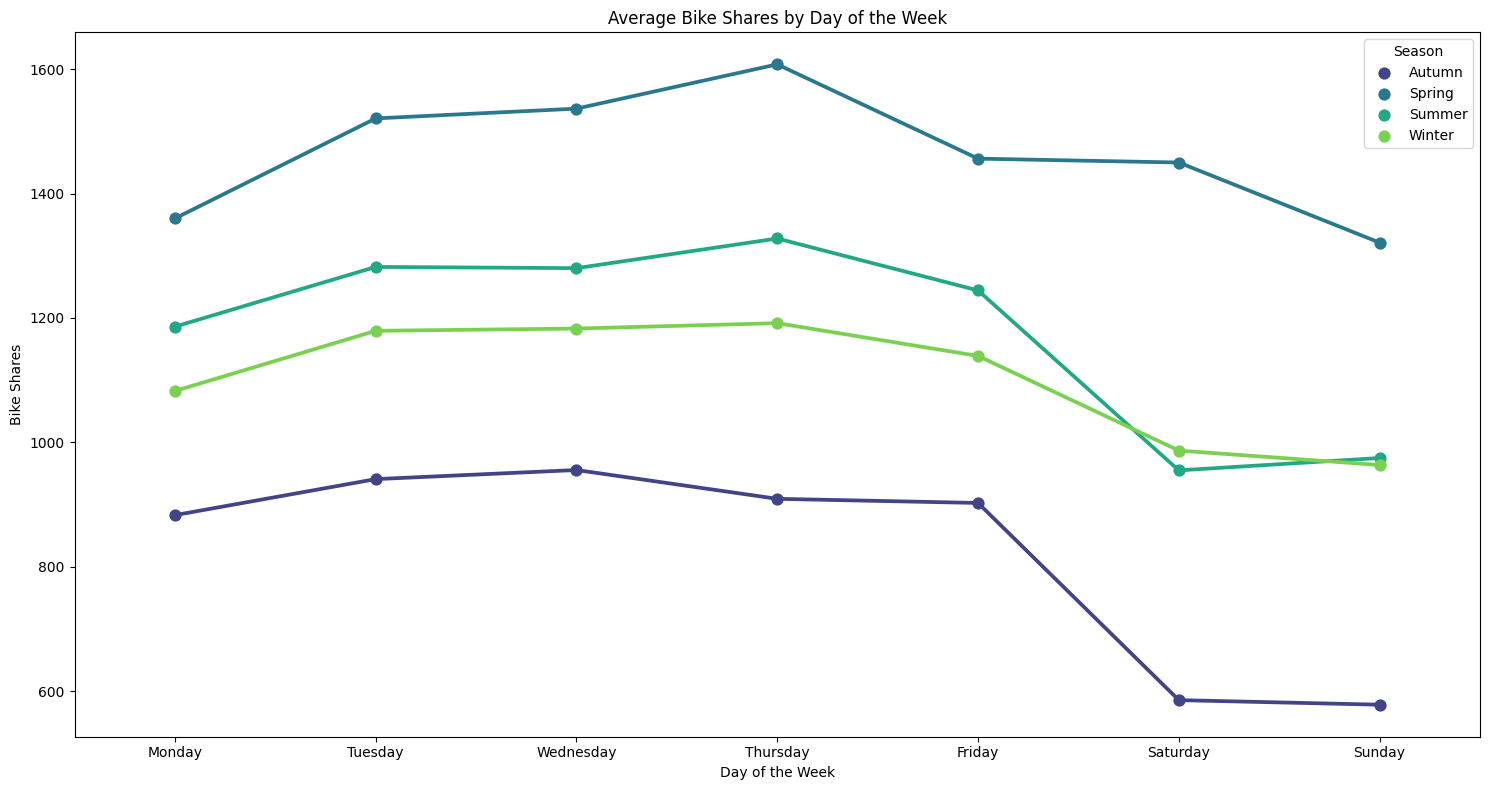

In [40]:
#Aggregating the data by season and day of the week
daily_seasonal_data = df.groupby(['season_label', 'day_of_week'])['cnt'].mean().reset_index()

# Define labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating the pointplot for each season showing bike sharing over days of the week
plt.figure(figsize=(15, 8))

# Plot for each season separately
sns.pointplot(x='day_of_week', y='cnt', hue='season_label', data=daily_seasonal_data, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Bike Shares')
plt.title('Average Bike Shares by Day of the Week')

# Update the x-axis labels to show the days of the week
plt.xticks(ticks=range(7), labels=day_labels)

plt.legend(title='Season')
plt.tight_layout()
plt.show()

 ### <font color='dodgerblue'> <b>Bike shares by day </b><font color='orange'>

In [36]:
df_sum_3 = pd.DataFrame(df.groupby("day_of_month").cnt.sum())
df_sum_3

,cnt
day_of_month,
1,619537
2,600641
3,635968
4,658083
5,652522
6,697667
7,684249
8,696937
9,725225


<Axes: xlabel='day_of_month', ylabel='cnt'>

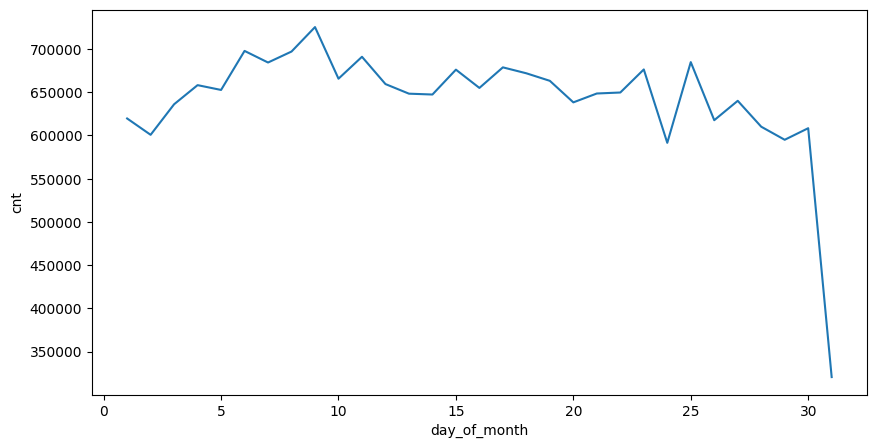

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(x="day_of_month",y="cnt", data = df_sum_3)

 ### <font color='dodgerblue'> <b>Bike shares by hours </b><font color='orange'>

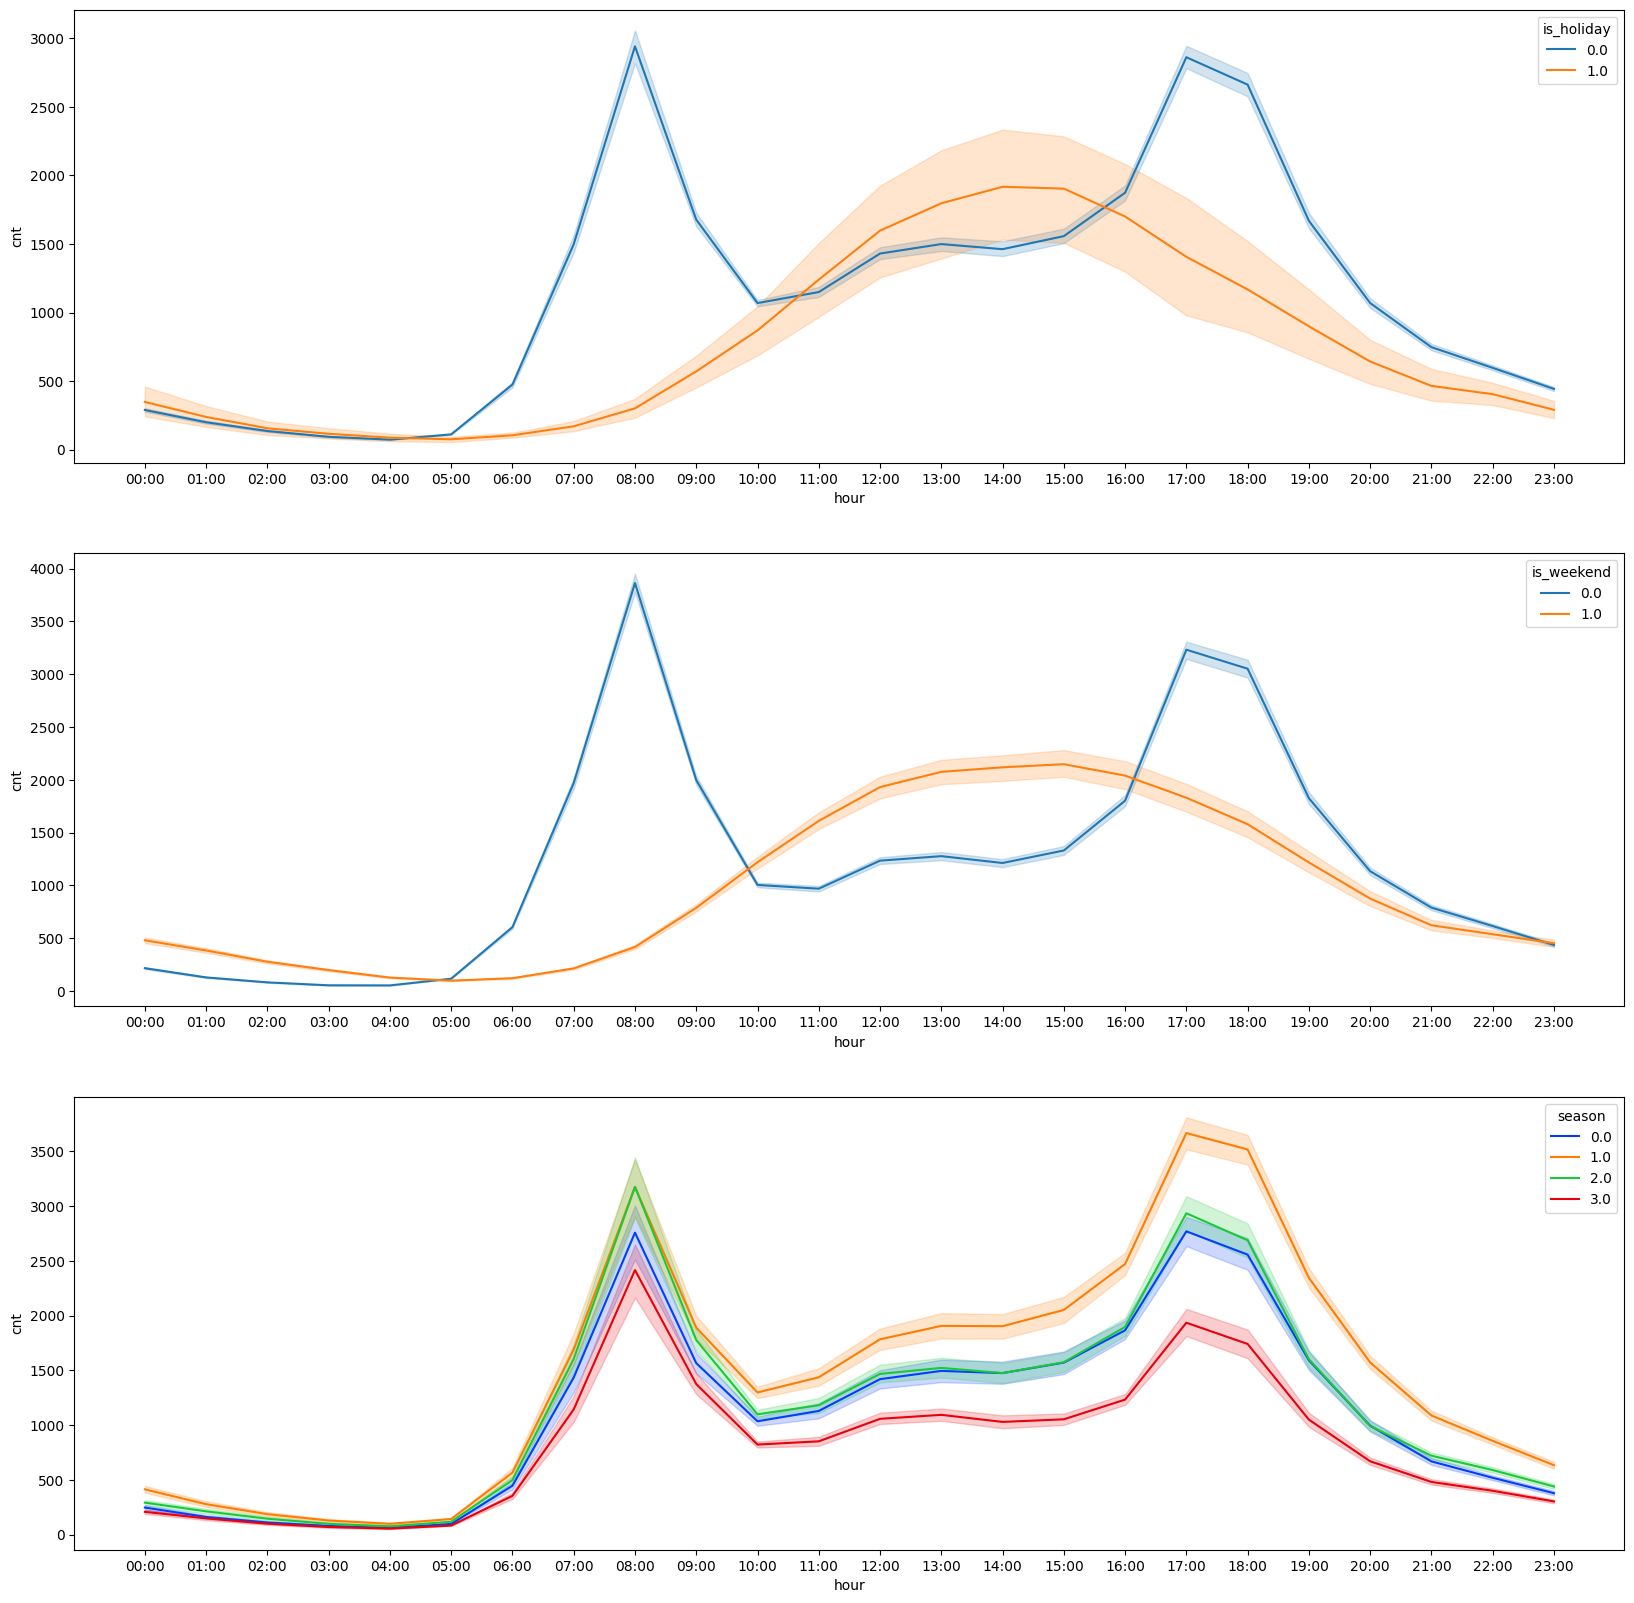

In [57]:
#df['hour'] = df['timestamp'].dt.hour
df['hour'] = df['hour'].apply(lambda x: '{:02d}:00'.format(x))
fig, ax = plt.subplots(3,1,figsize = (20,20))

ax[0] = sns.lineplot( data = df, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[0])
ax[1] = sns.lineplot( data = df, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[1])
ax[2] = sns.lineplot( data = df, x = "hour", y = "cnt", hue = "season",palette="bright", ax = ax[2])

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Plot bike shares by hours on (holidays, weekend, season). </font>  
 
- Hafta içi günlerde sabah ve akşam saatlerinde bisiklet kullanımında artış olduğu gözlenmektedir.
- Tatil olmayan günlerde bisiklet kullanımı daha artmaktadır.
- Haftasonu bisiklet kullanımı hafta içine göre daha az gerçekleşmektedir.
- Aynı saatler arasında Yaz mevsiminde daha fazla Bisiklet paylaşımı gözükmektedir.

### <font color='dodgerblue'> <b>Distribution of bike shares by weekday/weekend</b><font color='orange'>

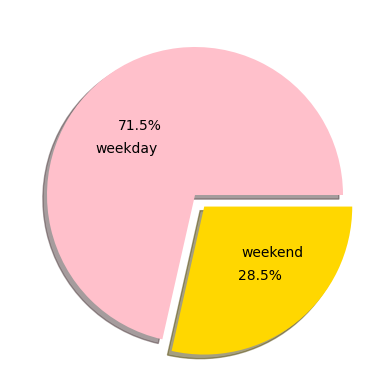

In [67]:
fig, ax = plt.subplots(figsize=(5,4)) 

colors_list = ["pink", "gold"]
explode_list = [0, 0.1]

ax.pie(df.is_weekend.value_counts().values,
       labels=["weekday", "weekend"],
       labeldistance=0.4,
       autopct="%.1f%%", shadow=True, 
       colors=colors_list, explode=explode_list)


plt.tight_layout()

plt.show()

 # <font color='dodgerblue'> <b> Distribution of Bike shares weather</b><font color='orange'>

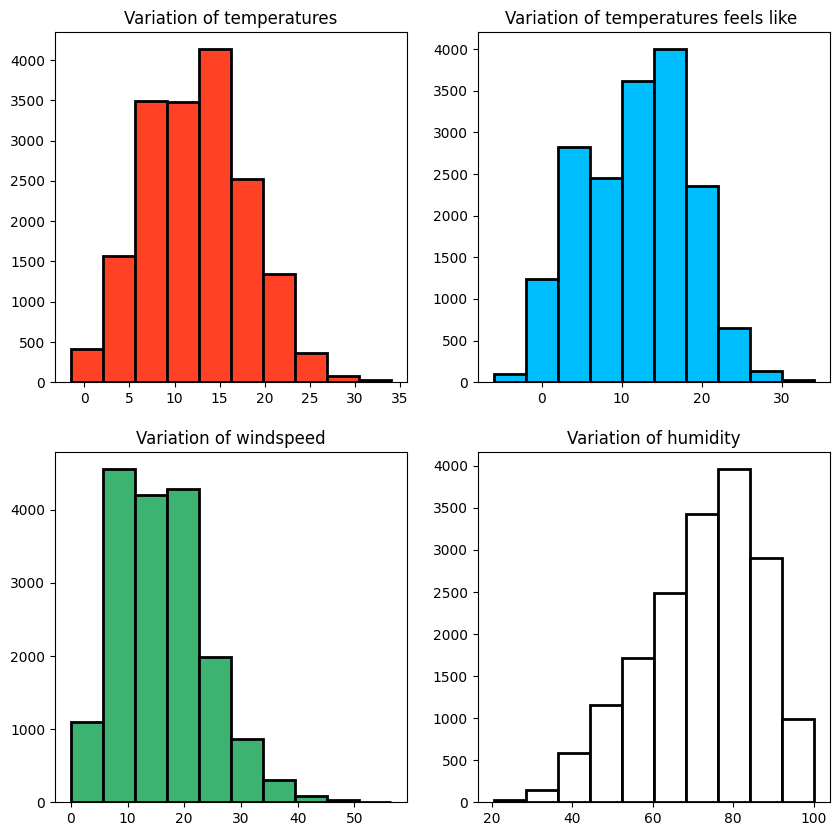

In [43]:
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="t1",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temperatures")
axes[0,1].hist(x="t2",data=df,edgecolor="black",linewidth=2,color="deepskyblue")
axes[0,1].set_title("Variation of temperatures feels like ")
axes[1,0].hist(x="wind_speed",data=df,edgecolor="black",linewidth=2,color="mediumseagreen")
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=df,edgecolor="black",linewidth=2,color="white")
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: </font>  
 
-  15 santigrat derece civarında frekans  daha fazladır.
-  Rüzgar hızında en çok frekans 5-10 km/sa aralığında görülmektdir.
-  Havadaki nem oranı frekansı %80 a kadar giderek artmaktadır.%80 den sonra  frekans düşmektedir.

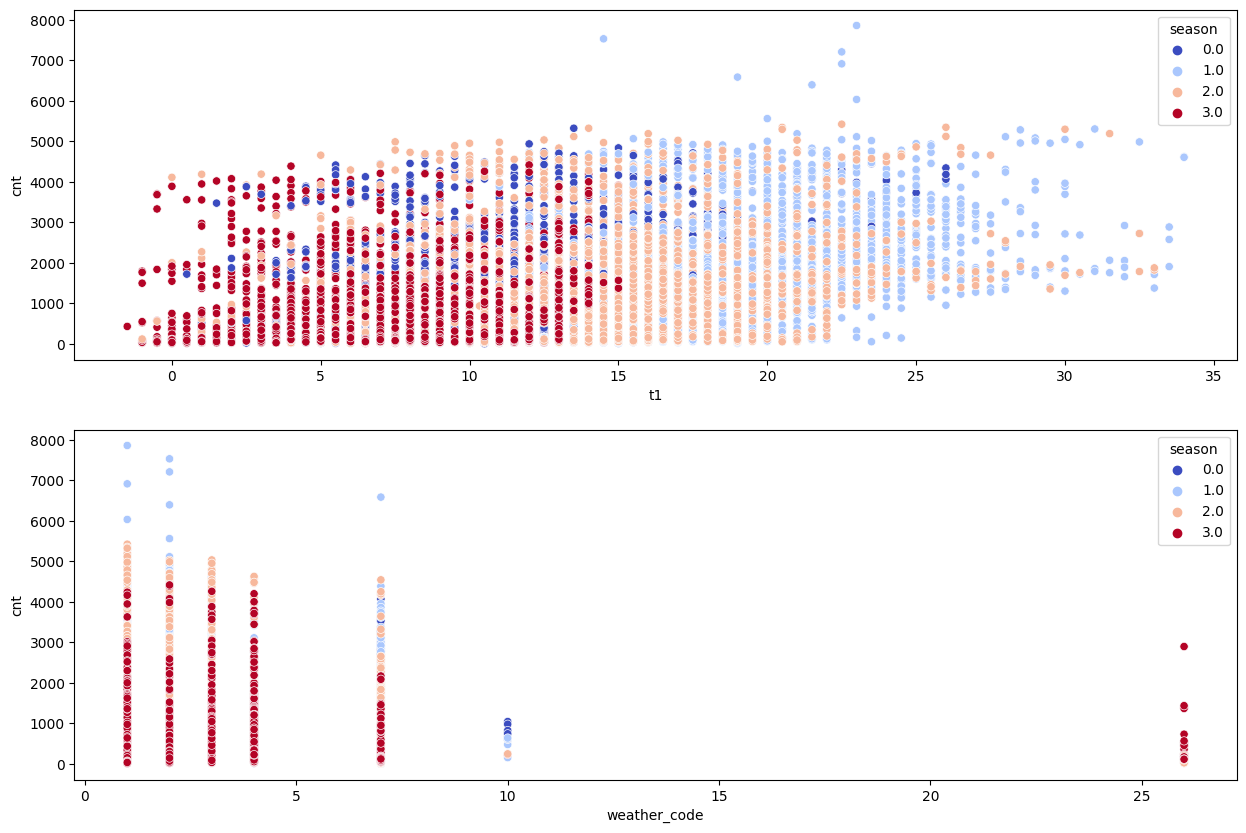

In [73]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (15,10))

sns.scatterplot(x = "t1", y = "cnt", hue = "season", data = df, ax = ax[0], palette = "coolwarm")
sns.scatterplot(x = "weather_code", y = "cnt", hue = "season", data = df, ax = ax[1], palette = "coolwarm");

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡CONCLUSİONS </font>  
 
- İnsanlar genellikle hava sisli, karlı ve yağmurlu olmadığında bisiklet paylaşımını tercih ediyorlar. İyi hava, bisiklet paylaşım miktarını arttırdığı gözlenmektedir. Bisiklet paylaşım miktarı, genellikle sabahın erken saatleri ve akşam saatlerindeki saatlerden etkileniyor. Bu nedenle insanların işe gitmeden önce veya sonra bisiklet almayı tercih ettiğini söyleyebiliriz. Mevsimler tercihi etkiliyor. Soğuk mevsimler, sıcak mevsimlere göre insanların daha az tercih etmesine neden olduğu gözlenmektedir.Sonuç olarak, hava ve sıcaklıkla uyumlu olarak insanlar genellikle işe gitmek için bisikleti tercih ederler. Sıcaklık ve hava durumunu etkileyen konular, insanların işe gitmek için bisiklet kullanma olasılığını etkiler.
- 2015 ve 2016 verilerini karşılaştırdığımızda gelecek yıllara dair çıkarımda bulunacak olursak,İnsanların çevre bilinci arttıkça bisiklet kullanım oranında artış gözlenebilir.   
